In [48]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ==================================================
# Nom du Projet : Estimation of Obesity Levels Based on Eating Habits and Physical Condition | HubbleMind
# Fichier : main.ipynb
# Auteur : Rajaa LEBNAITI
# Email : rajaa.lebnaiti@gmail.com

# ==================================================

# Copyright 2024 
# ==================================================

<h1><center> Estimation of Obesity Levels Based on Eating Habits and Physical Condition | HubbleMind </center></h1>

<h4>☕ Realisé par:</h4>
<ul>
    <li>Rajaa Lebnaiti</li>
</ul>


<h5> ✉ Email:   <a href="mailto:rajaa.lebnaiti@gmail.com">  rajaa.lebnaiti@gmail.com</a></h5>
<h5>🌐 LinkedIn:   <a href="https://www.linkedin.com/in/lebnaiti-rajaa/" target="_blank">  https://www.linkedin.com/in/lebnaiti-rajaa/</a></h5>
<h5>💼 GitHub:   <a href="https://github.com/RajaaLebnaiti" target="_blank">  https://github.com/RajaaLebnaiti/</a></h5>




<h1>Project Description:</h1>
<p>
In this project, we will analyze a dataset containing health and dietary information from individuals in Mexico, Peru, and Colombia. 

The goal is to estimate obesity levels based on physical condition and eating habits using Python for Data Science.

We will apply data cleaning,exploratory data analysis (EDA), advanced visualizations, and machine learning techniques to predict obesity levels.

<h1> Importing the librairies

In [49]:
# Importing librairies
import pandas as pd  

import numpy as np  

import matplotlib.pyplot as plt 

import seaborn as sns

from sklearn.preprocessing import LabelEncoder  # Label encoder

from sklearn.preprocessing import OneHotEncoder # One hot encoder

from sklearn.preprocessing import MinMaxScaler, StandardScaler # For normalization and standarization

from sklearn.model_selection import train_test_split


<h1><center><b> Week1: Data Importing and Cleaning

<h1>1-  Importing the dataset and inspect its structure

In [50]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [51]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Key Features:
1. **Gender** (Categorical)
2. **Age** (Continuous): Age of the individual
3. **Height** (Continuous): Height in meters
4. **Weight** (Continuous): Weight in kilograms
5. **family_history_with_overweight** (Binary): Whether the individual has a family member suffering from overweight
6. **FAVC** (Binary): Whether the individual eats high-calorie food frequently
7. **FCVC** (Continuous): Frequency of vegetable consumption in meals
8. **NCP** (Continuous): Number of main meals consumed daily
9. **CAEC** (Categorical): Food consumption between meals
10. **SMOKE** (Binary): Whether the individual smokes
11. **CH2O** (Continuous): Amount of water consumed daily
12. **SCC** (Binary): Whether the individual monitors calorie intake
13. **FAF** (Continuous): Frequency of physical activity
14. **TUE** (Continuous): Time spent using technological devices
15. **CALC** (Categorical): Alcohol consumption frequency
16. **MTRANS** (Categorical): Mode of transportation used

# Target Feature:
- **NObeyesdad** (Categorical): Obesity level categorized into 7 classes


In [52]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [54]:
# Let's check if there are any missing values

In [55]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [56]:
# So there are no missign values 

<h4> Let's check if there are any duplicated data

In [57]:
data.duplicated().sum()

24

There 24 rows duplicated

In [58]:
# Step 2: Show the duplicated rows
duplicated_rows = data[data.duplicated()]
print('Duplicated rows:')
print(duplicated_rows)

Duplicated rows:
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0  

In [59]:
# Drop duplicates
data = data.drop_duplicates()

In [60]:
# recheck if duplicates have been deleted
data.duplicated().sum()

0

In [61]:
data.info

<bound method DataFrame.info of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FA

In [62]:
# We went from 2111 records to 2087 recors after deleting the duplicated rows.

<h1>2- Data Type Conversion and Encoding

<h3> a-) Label encode binary variables like Gender, Smoke

In [63]:
le = LabelEncoder() # initialiaz Label Encoder

In [64]:
# Show values before encoding
print("Unique values before encoding:")
print("Gender:", data['Gender'].unique())
print("SMOKE:", data['SMOKE'].unique())

Unique values before encoding:
Gender: ['Female' 'Male']
SMOKE: ['no' 'yes']


In [65]:
# Now let's apply Label Encoding

In [66]:
# Label encoding for 'Gender'
data['Gender'] = le.fit_transform(data['Gender'])



# Label encoding for 'Smoke '
data['SMOKE'] = le.fit_transform(data['SMOKE'])

In [67]:
# Show values after label encoding
print("\nUnique values after Label Encoding:")
print("Gender:", data['Gender'].unique())
print("SMOKE:", data['SMOKE'].unique())


Unique values after Label Encoding:
Gender: [0 1]
SMOKE: [0 1]


In [68]:
# Female = 0   &   Male = 1

# No = 0       &   yes = 1

In [69]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,0,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,1,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,0,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,0,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,0,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<h3> b-) One-hot encode multi-class variables like MTRANS, NObeyesdad

In [70]:
print("Unique values before encoding:")
print("MTRANS:", data['MTRANS'].unique())
print("NObeyesdad:", data['NObeyesdad'].unique())

Unique values before encoding:
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [71]:
# One-Hot Encoding for multi-class variables
dummies = pd.get_dummies(data[['MTRANS', 'NObeyesdad']], drop_first=False)
data = pd.concat([data, dummies], axis=1)


In [72]:
# The new data after applying Label Encoding and One Hot Encoding 

In [73]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,0,...,0,1,0,0,1,0,0,0,0,0
1,0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,1,...,0,1,0,0,1,0,0,0,0,0
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,0,...,0,1,0,0,1,0,0,0,0,0
3,1,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,0,...,0,0,1,0,0,0,0,0,1,0
4,1,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,0,...,0,1,0,0,0,0,0,0,0,1


<p> We can see that we went from 17 features to 29 features and that because we applied one Hot Encoding 

We have 5  unique values for the feature MTRANS 

We have 7 unique values for the feature NObeyesdad

==> So when applying one hot encoding, we will create 5+7 new columns that refers to the unique values of the 2 features .

<h3>One hot encoding:</h3>

<p>One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.</p>

<img src="Images and Plots\oneHotEncoder.png" alt="One hot encoding.png">

<h1> 3- Outlier Detection and Handling

First , we will calculate the number of outliers

The first quartile (Q1, or the lowest quartile) is the 25th percentile, meaning that 25% of the data falls below the first quartile.


The third quartile (Q3, or the upper quartile) is the 75th percentile, meaning that 75% of the data falls below the third quartile.

In [74]:
# Detection outliers in Weight


# Calculate IQR for Weight
q1_weight = data['Weight'].quantile(0.25)  
q3_weight = data['Weight'].quantile(0.75)
iqr_weight = q3_weight - q1_weight

# Define upper bound for Weight
upper_bound_weight = q3_weight + 1.5 * iqr_weight

# Count outliers for Weight
outliers_weight = data[data['Weight'] > upper_bound_weight]
num_outliers_weight = outliers_weight.shape[0]

print(f'Number of outliers in Weight: {num_outliers_weight}')
print(f'The values of outliers in Weight: {outliers_weight["Weight"].values}')









# Detection outliers in Height


# Calculate IQR for Height
q1_height = data['Height'].quantile(0.25)
q3_height = data['Height'].quantile(0.75)
iqr_height = q3_height - q1_height

# Define upper bound for Height
upper_bound_height = q3_height + 1.5 * iqr_height

# Count outliers for Height
outliers_height = data[data['Height'] > upper_bound_height]
num_outliers_height = outliers_height.shape[0]
print("\n\n")
print(f'Number of outliers in Height: {num_outliers_height}')
print(f'The values of outliers in Height: {outliers_height["Height"].values}')



Number of outliers in Weight: 1
The values of outliers in Weight: [173.]



Number of outliers in Height: 1
The values of outliers in Height: [1.98]


Now, let's visualise those outliers

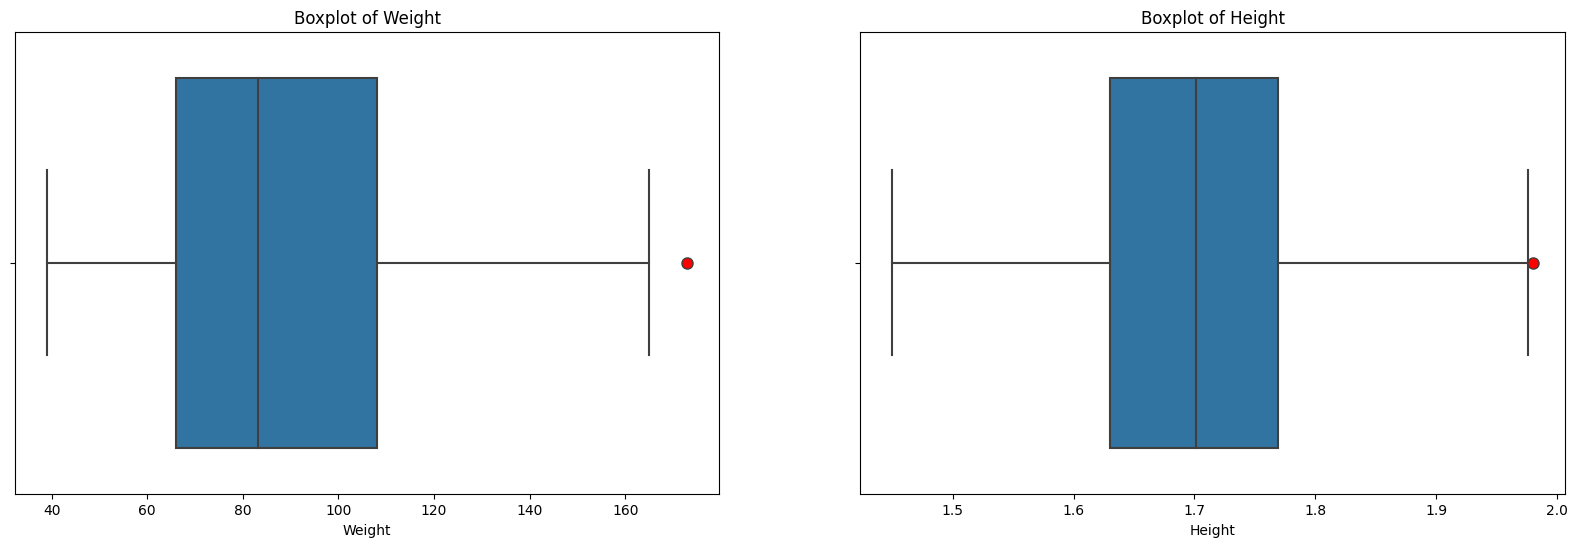

In [75]:
# Step 2: Visualize Outliers using Boxplots
plt.figure(figsize=(20, 6))

# Define the properties for the outlier points (the outlier is the red point)
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Boxplot for Weight
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Weight'], flierprops=flierprops)
plt.title('Boxplot of Weight')

# Boxplot for Height
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Height'], flierprops=flierprops)
plt.title('Boxplot of Height')

plt.show()

To handlle those outliers, we choose to work with capping method

In [76]:
# Step 1: Identify and Print Outliers Before Capping
# For Weight
q1_weight = data['Weight'].quantile(0.25)
q3_weight = data['Weight'].quantile(0.75)
iqr_weight = q3_weight - q1_weight

# Define bounds for Weight
upper_bound_weight = q3_weight + 1.5 * iqr_weight

# Identify outliers for Weight
outliers_weight_before = data[data['Weight'] > upper_bound_weight]['Weight']
print("Weight Outliers Before Capping:")
print(outliers_weight_before)

# For Height
q1_height = data['Height'].quantile(0.25)
q3_height = data['Height'].quantile(0.75)
iqr_height = q3_height - q1_height

# Define bounds for Height
upper_bound_height = q3_height + 1.5 * iqr_height

# Identify outliers for Height
outliers_height_before = data[data['Height'] > upper_bound_height]['Height']
print("Height Outliers Before Capping:")
print(outliers_height_before)



# Step 2: Apply Capping (Clip Method)
# Capping for Weight
data['Weight'] = data['Weight'].clip(upper=upper_bound_weight)

# Capping for Height
data['Height'] = data['Height'].clip(upper=upper_bound_height)




# Step 3: Identify and Print the Values of Outliers After Capping
outliers_weight_after = data.loc[outliers_weight_before.index, 'Weight']
outliers_height_after = data.loc[outliers_height_before.index, 'Height']

print("\nWeight Outliers After Capping:")
print(outliers_weight_after)

print("\nHeight Outliers After Capping:")
print(outliers_height_after)


Weight Outliers Before Capping:
344    173.0
Name: Weight, dtype: float64
Height Outliers Before Capping:
349    1.98
Name: Height, dtype: float64

Weight Outliers After Capping:
344    171.039767
Name: Weight, dtype: float64

Height Outliers After Capping:
349    1.978461
Name: Height, dtype: float64


Now Let's recalculate the number of outliers after applying the capping method

In [77]:
# Calculate IQR for Weight
q1_weight = data['Weight'].quantile(0.25)
q3_weight = data['Weight'].quantile(0.75)
iqr_weight = q3_weight - q1_weight

# Define upper bound for Weight
upper_bound_weight = q3_weight + 1.5 * iqr_weight

# Count outliers for Weight
outliers_weight = data[data['Weight'] > upper_bound_weight]
num_outliers_weight = outliers_weight.shape[0]

print(f'Number of outliers in Weight: {num_outliers_weight}')

# Calculate IQR for Height
q1_height = data['Height'].quantile(0.25)
q3_height = data['Height'].quantile(0.75)
iqr_height = q3_height - q1_height

# Define upper bound for Height
upper_bound_height = q3_height + 1.5 * iqr_height

# Count outliers for Height
outliers_height = data[data['Height'] > upper_bound_height]
num_outliers_height = outliers_height.shape[0]

print(f'Number of outliers in Height: {num_outliers_height}')


Number of outliers in Weight: 0
Number of outliers in Height: 0


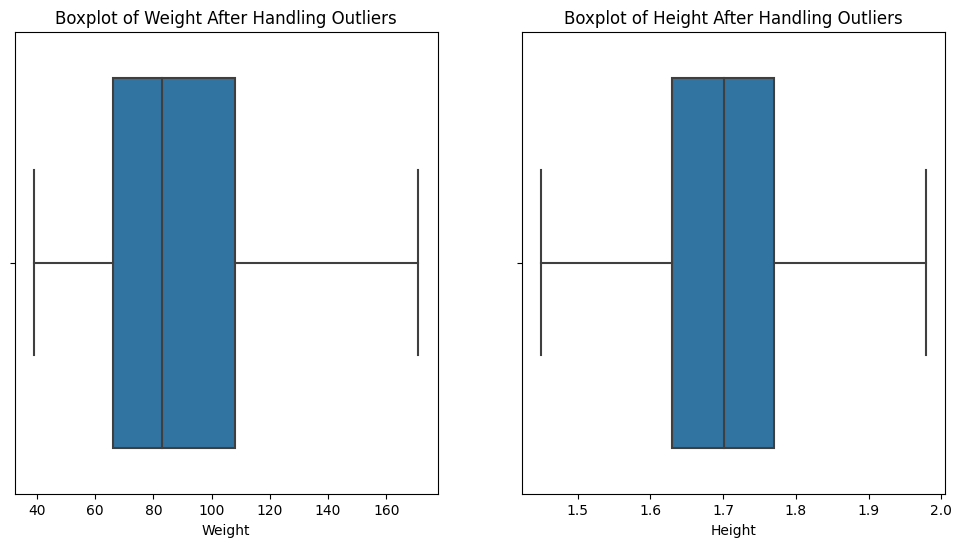

In [78]:
# Verify the changes
plt.figure(figsize=(12, 6))

# Boxplot for Weight after handling outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Weight'])
plt.title('Boxplot of Weight After Handling Outliers')

# Boxplot for Height after handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Height'])
plt.title('Boxplot of Height After Handling Outliers')

plt.show()

In [79]:
# No outliers are found 

<h1> 4- Normalization/Standardization

<h4> Normalization (Min-Max Scaling)


In [80]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()


In [81]:
# Define the columns to normalize
columns_to_normalize = ['Age', 'Weight', 'Height']



In [82]:
# Before normalisation : 
data[columns_to_normalize].describe()

,Age,Weight,Height
count,2087.000000,2087.000000,2087.000000
mean,24.353090,86.857790,1.702673
std,6.368801,26.187791,0.093184
min,14.000000,39.000000,1.450000
25%,19.915937,66.000000,1.630178
50%,22.847618,83.101100,1.701584
75%,26.000000,108.015907,1.769491
max,61.000000,171.039767,1.978461


In [83]:
# Apply Min-Max scaling
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])



In [84]:
# after the normalization
data[columns_to_normalize].describe()

,Age,Weight,Height
count,2087.000000,2087.000000,2087.000000
mean,0.220279,0.362450,0.478131
std,0.135506,0.198333,0.176330
min,0.000000,0.000000,0.000000
25%,0.125871,0.204484,0.340949
50%,0.188247,0.333999,0.476069
75%,0.255319,0.522690,0.604570
max,1.000000,1.000000,1.000000


# Week 1 summary

## Task 1: Data Importing and Inspection
- Imported the dataset `ObesityDataSet_raw_and_data_sinthetic.csv`.
- Inspected the structure using `head()`, `describe()`, and `info()` to understand the dataset.
- Checked for missing values using `isnull().sum()` and found no missing values.
- Checked for duplicated rows, found 24 duplicates, and removed them using `drop_duplicates()`.

## Task 2: Data Type Conversion and Encoding
- Encoded binary variables such as 'Gender' and 'SMOKE' using `LabelEncoder()`.
- One-hot encoded multi-class variables like 'MTRANS' and the target variable 'NObeyesdad' using `pd.get_dummies()`.

## Task 3: Outlier Detection and Handling
- Detected outliers for 'Weight' and 'Height' using the Interquartile Range (IQR) method.
- Calculated Q1, Q3, and IQR for both 'Weight' and 'Height'.
- Defined upper bounds using the formula `Q3 + 1.5 * IQR` and detected 1 outlier for both 'Weight' and 'Height'.
- Handled outliers using the capping method by replacing values above the upper bound with the upper bound for both 'Weight' and 'Height'.
- Printed the outlier values before and after capping.

## Task 4: Normalization
- Applied `MinMaxScaler()` to normalize the continuous variables: 'Age', 'Weight', and 'Height', bringing their values between 0 and 1.


<h1><center><b> Week 2: Exploratory Data Analysis (EDA)

<h1> 1- Summary Statistics


In [85]:
data.describe()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,...,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.504073,0.220279,0.478131,0.362450,2.421466,2.701179,0.021083,2.004749,1.012812,0.663035,...,0.005271,0.746526,0.026354,0.127935,0.135122,0.168184,0.142310,0.155247,0.132247,0.138955
std,0.500103,0.135506,0.176330,0.198333,0.534737,0.764614,0.143695,0.608284,0.853475,0.608153,...,0.072426,0.435104,0.160223,0.334097,0.341936,0.374119,0.349451,0.362227,0.338841,0.345983
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.125871,0.340949,0.204484,2.000000,2.697467,0.000000,1.590922,0.124505,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.188247,0.476069,0.333999,2.396265,3.000000,0.000000,2.000000,1.000000,0.630866,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.255319,0.604570,0.522690,3.000000,3.000000,0.000000,2.466193,1.678102,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# Generate summary statistics for continuous variables
# Continuous variables
continuous_vars = ['Age', 'Weight', 'Height']

# Calculate and store summary statistics
summary_stats = {
    'Mean': data[continuous_vars].mean(),
    'Median': data[continuous_vars].median(),
    'Mode': data[continuous_vars].mode().iloc[0],  # First mode
    'Min': data[continuous_vars].min(),
    'Max': data[continuous_vars].max(),
    'Std Dev': data[continuous_vars].std(),
    'Range': data[continuous_vars].max() - data[continuous_vars].min()
}

# Display the summary statistics in a table format
summary_df = pd.DataFrame(summary_stats)
print(summary_df)


            Mean    Median      Mode  Min  Max   Std Dev  Range
Age     0.220279  0.188247  0.085106  0.0  1.0  0.135506    1.0
Weight  0.362450  0.333999  0.310513  0.0  1.0  0.198333    1.0
Height  0.478131  0.476069  0.473072  0.0  1.0  0.176330    1.0


<h1> 2- Distribution Analysis

In [87]:
# We will plot histograms and KDE plots for key variables like Age, Weight, and Height to understand the data distribution

<h4> Note that these plots are used on normalised data !

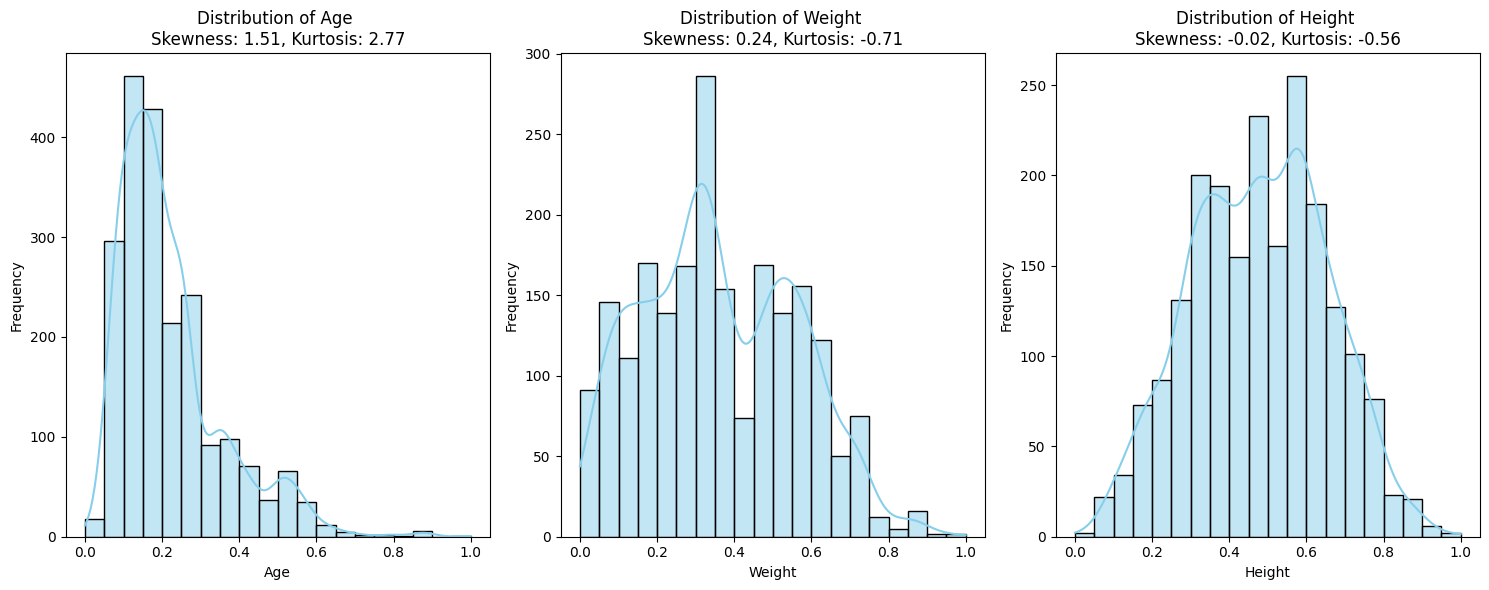

In [88]:
# Define the key variables
continuous_vars = ['Age', 'Weight', 'Height']

# Set up the plot grid
plt.figure(figsize=(15, 6))

for i, var in enumerate(continuous_vars):
    # Create a subplot for each variable
    plt.subplot(1, 3, i + 1)
    
    # Plot histogram with KDE
    sns.histplot(data[var], kde=True, color='skyblue', bins=20)
    
    # Calculate skewness and kurtosis
    skewness = data[var].skew()
    kurtosis = data[var].kurt()

    # Set titles and labels
    plt.title(f'Distribution of {var} \nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Observations on the Distribution of Continuous Normalized Features


## Age:
- **Skewness (1.51):** This shows a right-skewed distribution, meaning the majority of data points are concentrated on the left, with a few higher values pulling the tail to the right.
- **Kurtosis (2.77):** A kurtosis greater than 0 indicates that the distribution has heavier tails and a sharper peak than a normal distribution, implying more outliers.
- **Observation:** The distribution is not normal, with many younger ages and fewer older individuals.

## Weight:
- **Skewness (0.24):** A very small positive skew suggests the distribution is almost symmetric but slightly skewed to the right.
- **Kurtosis (-0.71):** The negative kurtosis value indicates that the distribution has lighter tails and is less peaked compared to a normal distribution, implying fewer extreme values.
- **Observation:** The weight distribution is close to normal but still shows slight asymmetry.

## Height:
- **Skewness (-0.02):** The skewness is very close to 0, indicating a nearly perfect symmetric distribution.
- **Kurtosis (-0.56):** The negative kurtosis suggests a flatter distribution than normal, with lighter tails.
- **Observation:** Height seems to follow a near-normal distribution, with a balanced spread of values around the mean.

## Summary:
- **Age** has a clear right skew, which indicates that the dataset contains mostly younger individuals.
- **Weight** and **Height** are close to normal distributions, but the weight distribution is slightly skewed, possibly due to outliers that were capped earlier.
- The combination of skewness and kurtosis values helps confirm that **Age** might need special handling due to its skewness, but the other variables don't deviate much from normality.


In [89]:
# Let's apply Square Root Transformation to reduce right skewness



In [90]:
data['Age'] = np.sqrt(data['Age'])


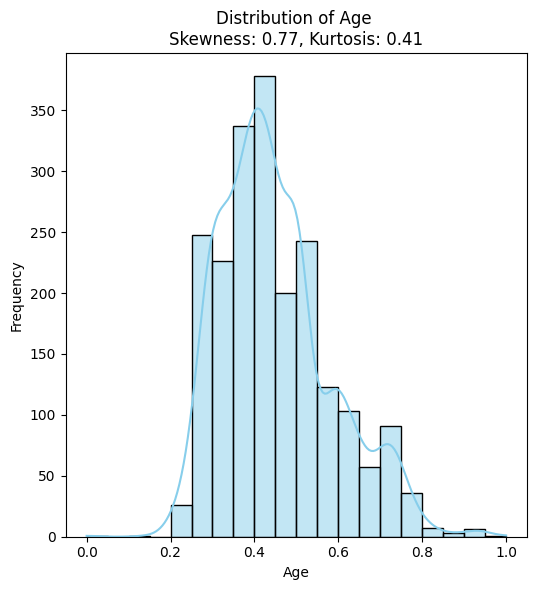

In [91]:
# Define the key variables
continuous_vars = ['Age']

# Set up the plot grid
plt.figure(figsize=(15, 6))

for i, var in enumerate(continuous_vars):
    # Create a subplot for each variable
    plt.subplot(1, 3, i + 1)
    
    # Plot histogram with KDE
    sns.histplot(data[var], kde=True, color='skyblue', bins=20)
    
    # Calculate skewness and kurtosis
    skewness = data[var].skew()
    kurtosis = data[var].kurt()

    # Set titles and labels
    plt.title(f'Distribution of {var} \nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


<h1> 3- Relationship Exploration

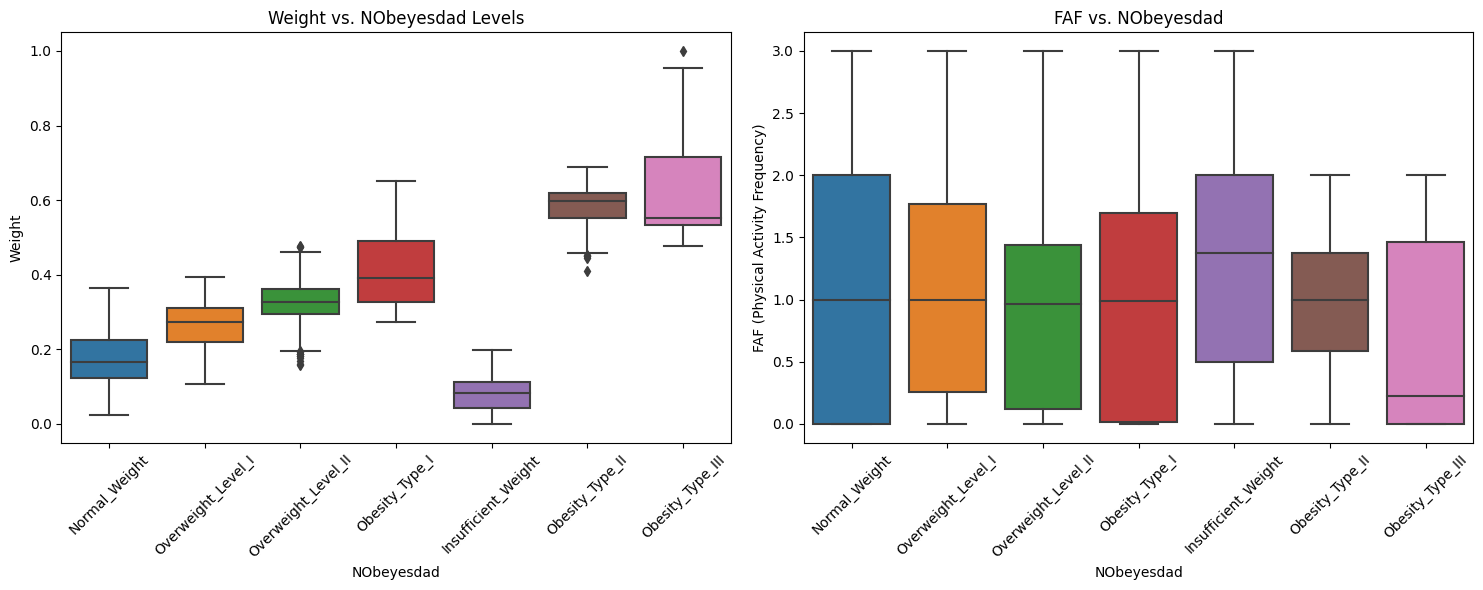

In [92]:
# Set up the plot grid for Weight and FAF
plt.figure(figsize=(15, 6))

# Boxplot for Weight vs. Obesity Levels
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad Levels')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('NObeyesdad')
plt.ylabel('Weight')

# Boxplot for FAF (Physical Activity Frequency) vs. Obesity Levels
plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad')
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad')
plt.ylabel('FAF (Physical Activity Frequency)')
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Analysis of Weight and Physical Activity Frequency (FAF) in Relation to NObeyesdad Levels

**Observations:**

* Weight vs. NObeyesdad Levels:

There's a clear trend of increasing weight with higher NObeyesdad levels.
The median weight for each NObeyesdad level is consistently higher than the previous level, indicating a strong positive correlation.
The interquartile ranges (IQRs) also tend to increase with higher NObeyesdad levels, suggesting greater variability in weight within each category.
Outliers are present in some categories, particularly in the higher NObeyesdad levels.

* FAF vs. NObeyesdad Levels:

There's a slight decrease in FAF with increasing NObeyesdad levels, though the trend is less pronounced than the weight-NObeyesdad relationship.
The median FAF for each NObeyesdad level is generally lower than the previous level, suggesting a weak negative correlation.
The IQRs for FAF are relatively similar across different NObeyesdad levels, indicating consistent variability in physical activity frequency.
Outliers are also present in some FAF categories.



<h1> 4- Correlation Analysis

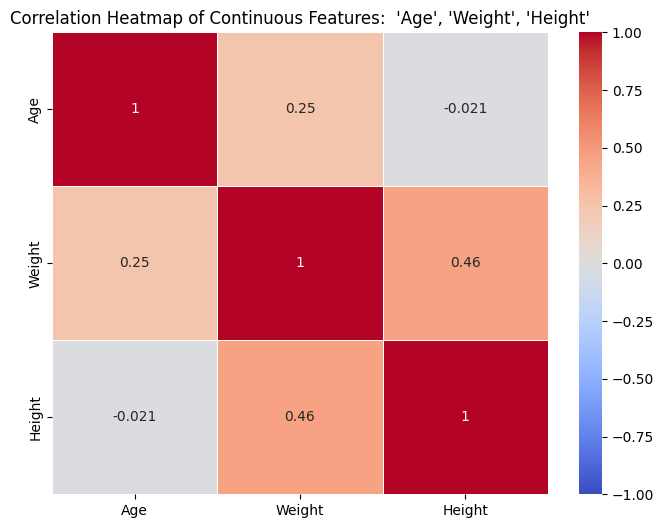

In [93]:
# Select continuous variables for correlation heatmap in our case 'Age' , 'Weight' , 'Height'
continuous_vars = ['Age', 'Weight', 'Height']

# Calculate the correlation matrix
correlation_matrix = data[continuous_vars].corr()

# Set up the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Features:  \'Age\', \'Weight\', \'Height\'')
plt.show()


# Key Observations:

- **Weight and Height (0.46):**  
  There is a moderate positive correlation between Weight and Height. This suggests that taller individuals tend to weigh more, which is a common pattern, though the correlation is not very strong.

- **Age and Weight (0.25):**  
  There is a weak positive correlation between Age and Weight. This indicates that as age increases, weight might increase slightly, but the relationship is weak and may not be consistent across the population.

- **Age and Height (-0.021):**  
  The correlation between Age and Height is almost zero, with a slightly negative value. This means that there is no significant relationship between age and height in this dataset.

# Overall:
The strongest relationship here is between Weight and Height, which makes sense biologically. However, all other relationships are weak, indicating little to no linear relationship between Age and either Weight or Height.


<h1><center><b> Week 3: Advanced Visualizations and Machine Learning

<h1>1- Advanced Visualizations

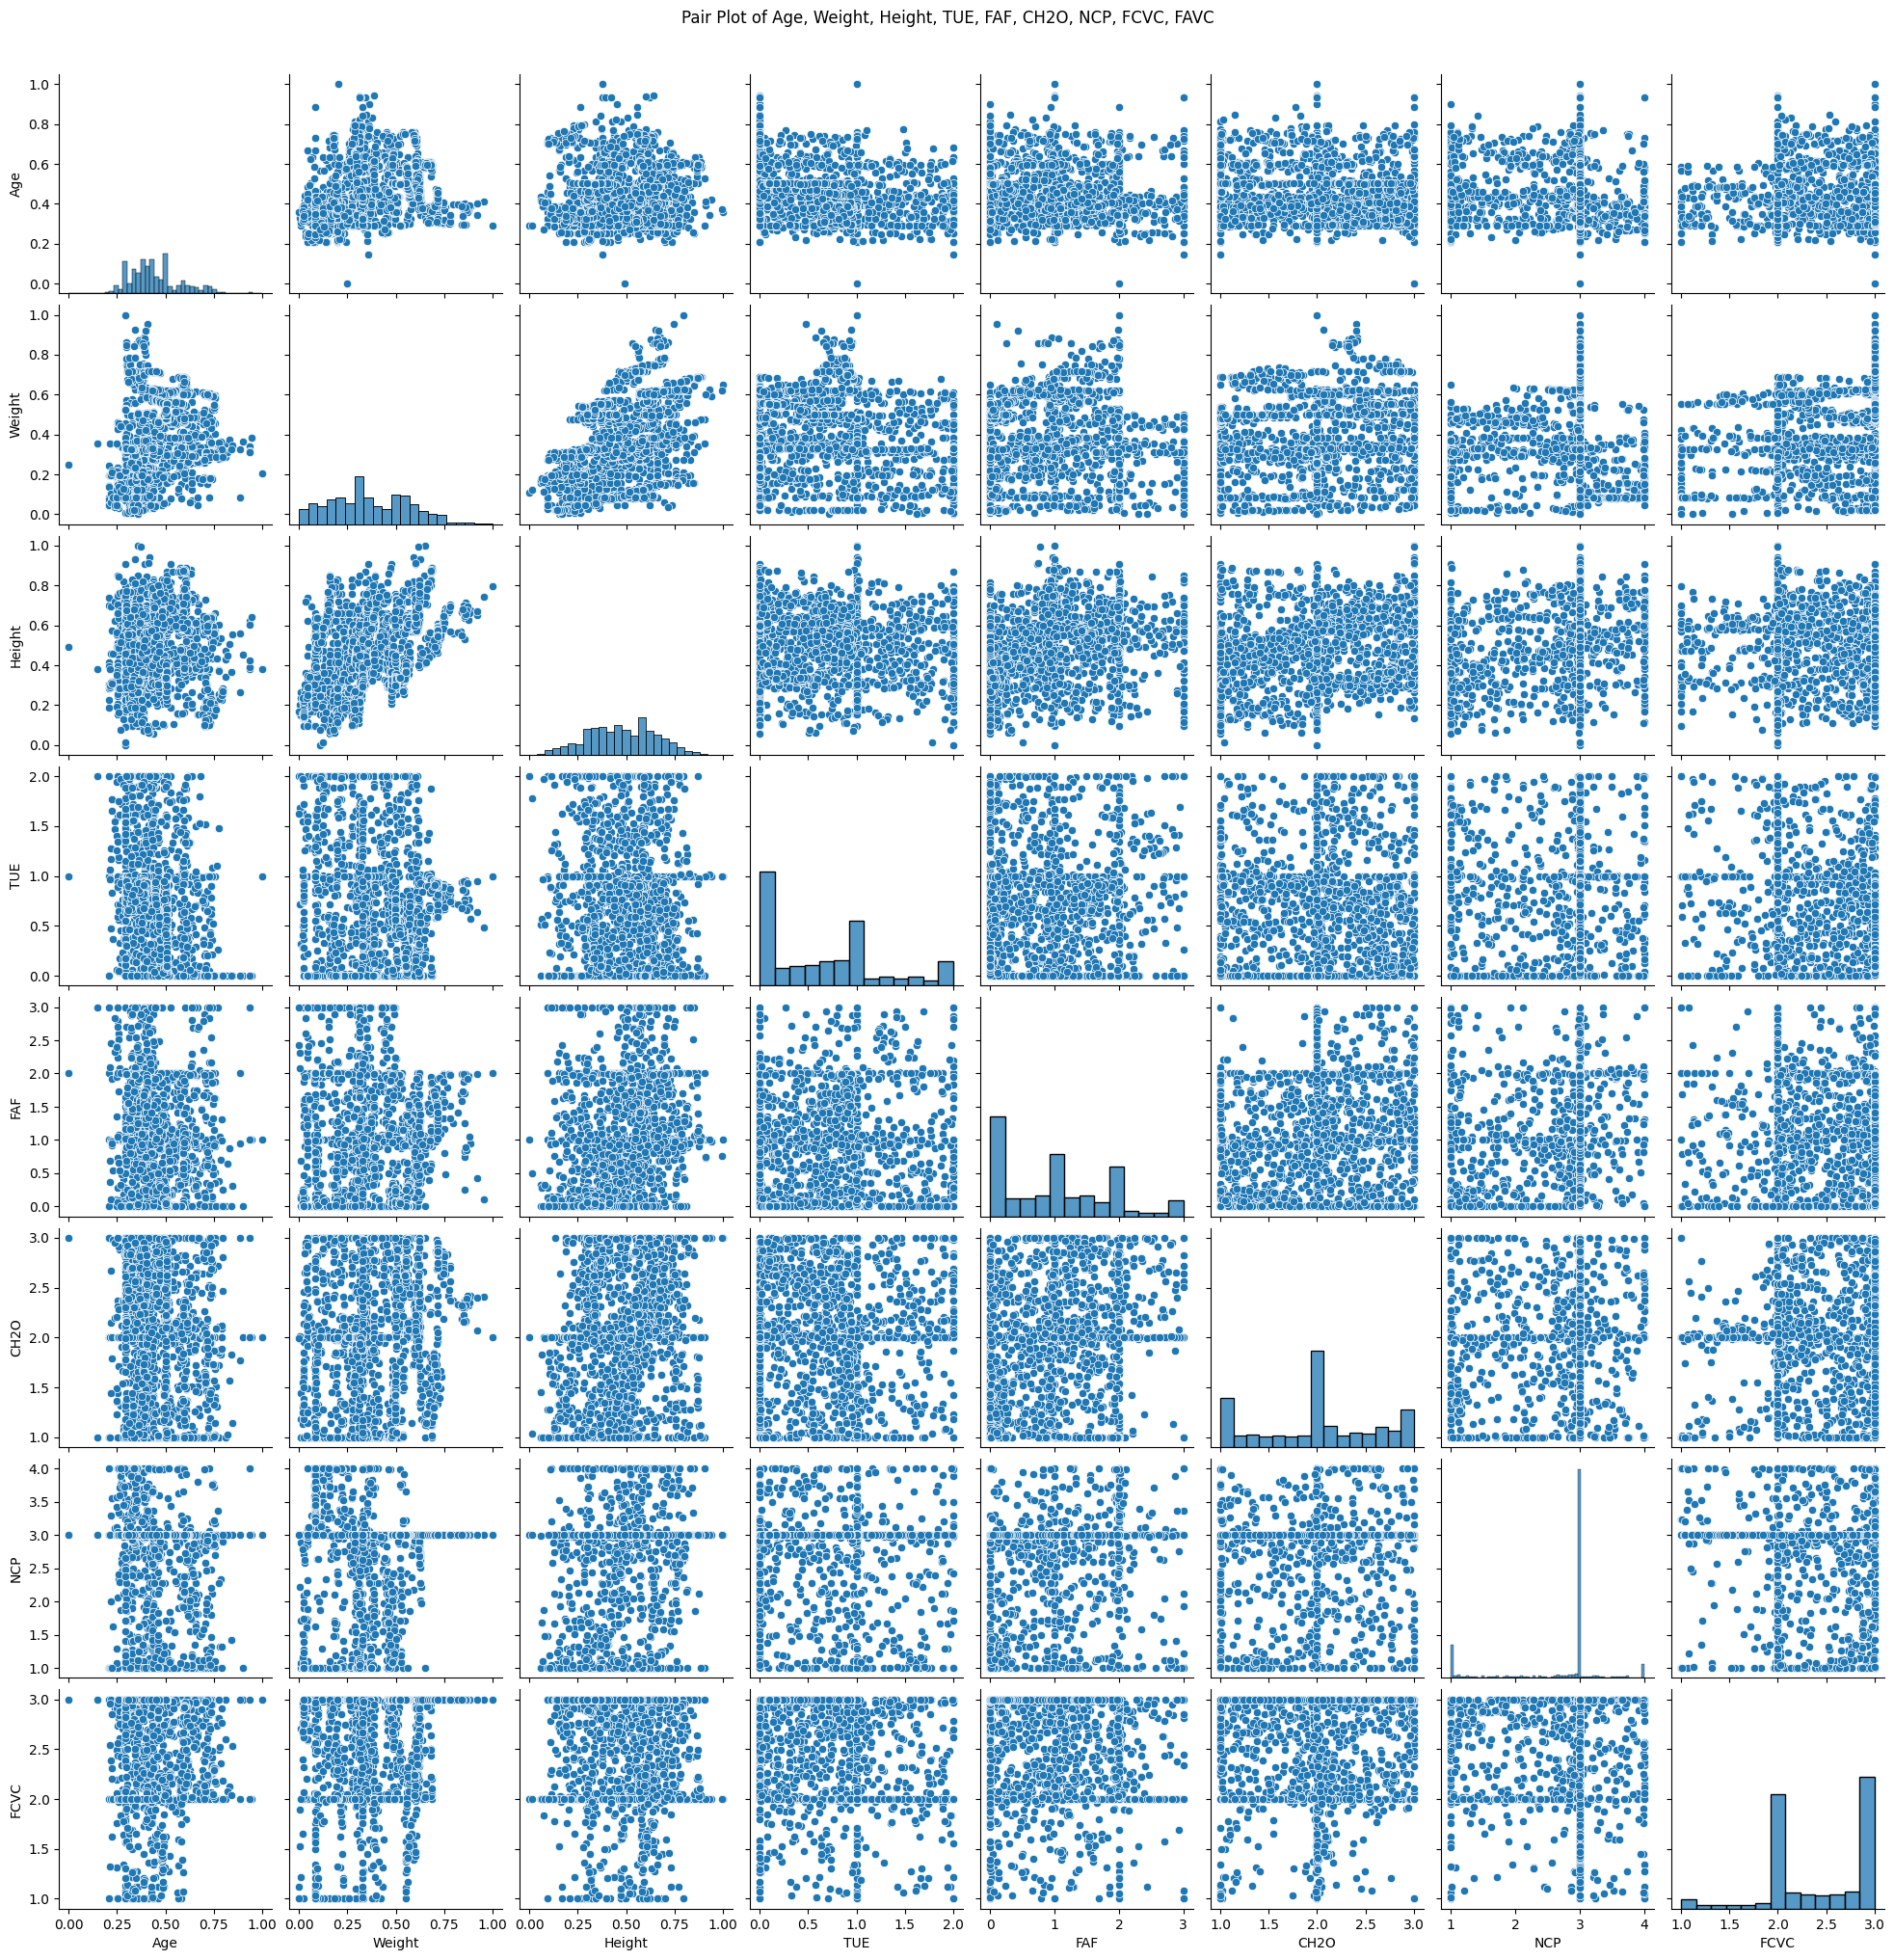

In [94]:
# Pair plots for continuous features
sns.pairplot(data[['Age', 'Weight', 'Height', 'TUE', 'FAF', 'CH2O', 'NCP', 'FCVC', 'FAVC' ]])
plt.suptitle('Pair Plot of Age, Weight, Height, TUE, FAF, CH2O, NCP, FCVC, FAVC', y=1.02)
plt.show()


The distributions of most variables, particularly the continuous ones (Age, Weight, Height, TUE, FAF, CH20, NCP, FCVC, and FAVC), appear to be skewed to the right. 

This suggests that a larger proportion of individuals have lower values for these variables.


Some variables, such as TUE, FAF, CH20, and NCP, have more distinct patterns in their distributions, indicating potential clustering or grouping.

<h1> 2- Feature Engineering and Scaling

<h4> Before we go to the train test split , we will add another encoding for the remaining binary categorical features 

In [95]:
binary_features = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']
le = LabelEncoder()

# Apply Label Encoding to binary features
for feature in binary_features:
    data[feature] = le.fit_transform(data[feature])

<h1> 3- Train-Test-Split

In [96]:
# Define the features X and target variable y

# Fisrt : the features X
X = data.drop(columns=['NObeyesdad', 'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 
                       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 
                       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 
                       'NObeyesdad_Overweight_Level_II','MTRANS'])
# We dropped all the columns of NObeyesdad because they are the target



# Then: the targe y
# Use the original 'NObeyesdad' as the target variable
y = data['NObeyesdad'] 

In [97]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [98]:
X_train.shape

(1669, 20)

In [99]:
X_test.shape

(418, 20)

In [100]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1573,1,0.502838,0.600001,0.569019,1,1,2.225731,3.000000,2,0,2.154326,0,1.266866,0.390178,2,0,0,0,1,0
1598,1,0.595849,0.368082,0.462015,1,1,2.964050,2.123138,2,0,1.000000,0,1.699181,0.620465,3,0,0,0,1,0
1179,1,0.846848,0.556209,0.346329,1,1,2.535315,3.000000,2,0,1.146595,0,0.313810,0.000000,3,1,0,0,0,0
621,0,0.437564,0.548968,0.111006,1,1,2.241606,3.000000,1,0,1.846626,0,2.460238,0.814518,3,0,0,0,1,0
930,0,0.386183,0.296730,0.217919,1,1,2.000000,3.156309,3,0,3.000000,0,1.179592,0.086868,2,0,0,0,1,0


In [101]:
y_train.head

<bound method NDFrame.head of 1573        Obesity_Type_II
1598        Obesity_Type_II
1179    Overweight_Level_II
621     Insufficient_Weight
930      Overweight_Level_I
               ...         
180           Normal_Weight
1009    Overweight_Level_II
1588        Obesity_Type_II
130           Normal_Weight
1165    Overweight_Level_II
Name: NObeyesdad, Length: 1669, dtype: object>

<h1> 4- Machine Learning Model Implementation

*** Logistic regression ***

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)
# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))





Logistic Regression Accuracy: 0.7368
Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.85      0.80        53
      Normal_Weight       0.60      0.47      0.53        57
     Obesity_Type_I       0.70      0.77      0.73        70
    Obesity_Type_II       0.74      1.00      0.85        60
   Obesity_Type_III       0.94      0.98      0.96        65
 Overweight_Level_I       0.76      0.64      0.69        55
Overweight_Level_II       0.56      0.40      0.46        58

           accuracy                           0.74       418
          macro avg       0.72      0.73      0.72       418
       weighted avg       0.72      0.74      0.72       418

Confusion Matrix for Logistic Regression:
[[45  7  0  0  0  1  0]
 [14 27  1  0  0  4 11]
 [ 0  1 54 11  1  1  2]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  8  4  2  1 35  5]
 [ 1  2 18  7  2  5 23]]


*** Random forest ***

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9450
Classification Report for Random Forest:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        53
      Normal_Weight       0.83      0.91      0.87        57
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      1.00      1.00        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.86      0.89      0.88        55
Overweight_Level_II       0.95      0.91      0.93        58

           accuracy                           0.94       418
          macro avg       0.95      0.94      0.94       418
       weighted avg       0.95      0.94      0.95       418

Confusion Matrix for Random Forest:
[[50  3  0  0  0  0  0]
 [ 0 52  0  0  0  4  1]
 [ 0  0 67  0  0  1  2]
 [ 0  0  0 60  0  0  0]
 [ 0  0  1  0 64  0  0]
 [ 0  6  0  0  0 49  0]
 [ 0  2  0  0  0  3 53]]


# Bonus:

*** Gradient Boosting Classifier ***

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

# Print classification report
print("Classification Report for GradientBoostingClassifiert:")
print(classification_report(y_test, y_pred_gb))

# Print confusion matrix
print("Confusion Matrix for GradientBoostingClassifier:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9689
Classification Report for GradientBoostingClassifiert:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.95      0.95      0.95        57
     Obesity_Type_I       1.00      0.99      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.89      0.89        55
Overweight_Level_II       0.95      0.97      0.96        58

           accuracy                           0.97       418
          macro avg       0.97      0.97      0.97       418
       weighted avg       0.97      0.97      0.97       418

Confusion Matrix for GradientBoostingClassifier:
[[53  0  0  0  0  0  0]
 [ 0 54  0  0  0  3  0]
 [ 0  0 69  0  0  1  0]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  3  0  0  0 49  3]
 [ 0  0  0  0  0  2 56]]


In [105]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")

# Print classification report
print("Classification Report for MLPClassifier:")
print(classification_report(y_test, y_pred_mlp))

# Print confusion matrix
print("Confusion Matrix for MLPClassifier:")
print(confusion_matrix(y_test, y_pred_mlp))



MLP Accuracy: 0.9545
Classification Report for MLPClassifier:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        53
      Normal_Weight       0.93      0.91      0.92        57
     Obesity_Type_I       0.97      0.99      0.98        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.88      0.89      0.88        55
Overweight_Level_II       0.92      0.93      0.92        58

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.95      0.95      0.95       418

Confusion Matrix for MLPClassifier:
[[52  1  0  0  0  0  0]
 [ 0 52  0  0  0  5  0]
 [ 0  0 69  0  0  0  1]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  0 49  4]
 [ 0  1  1  0  0  2 54]]


So after trying several algorithms we found that the best performance is for the Gradient Boosting model with an accuracy of 0.9689

<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Macro Avg Precision</th>
            <th>Macro Avg Recall</th>
            <th>Macro Avg F1 Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Logistic Regression</td>
            <td>0.7368</td>
            <td>0.7430</td>
            <td>0.7368</td>
            <td>0.7316</td>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>0.9450</td>
            <td>0.9506</td>
            <td>0.9427</td>
            <td>0.9455</td>
        </tr>
        <tr>
            <td>Gradient Boosting</td>
            <td>0.9689</td>
            <td>0.9726</td>
            <td>0.9689</td>
            <td>0.9689</td>
        </tr>
        <tr>
            <td>MLP Classifier</td>
            <td>0.9545</td>
            <td>0.9529</td>
            <td>0.9545</td>
            <td>0.9535</td>
        </tr>
    </tbody>
</table>


# Conclusion

Overall, Gradient boosting stands out as the most effective model for your dataset, achieving the best balance of precision, recall, and F1-score across the various obesity levels.

<h1><center><b> Week 4: Model Evaluation and Reporting

<h1> 1- Model Evaluation Report


<h4>Summary of Findings :</h4>
<ul>
<li>

Logistic Regression: Accuracy: 0.7368. This model performed the weakest in terms of accuracy and f1-score.

</li>
<li>

Random Forest: Accuracy: 0.9450. This model has good precision and recall, making it a solid performer for classification tasks.


</li>

Gradient Boosting: Accuracy: 0.9689. This model achieved the highest accuracy and balanced precision, recall, and f1-score across classes.</li>


<li>
MLP Classifier: Accuracy: 0.9545. This model performed well, but not as well as Gradient Boosting in terms of accuracy.
</li>
</ul>

<h1> 2- Documentation

Please chech the report summarizing the entire project, including the dataset description, data preprocessing, EDA, model building, and evaluation. 


Here is the <a href="./Report/FINAL Report Estimation_of_Obesity_Levels.pdf" target="_blank">download link to my report</a> for the obesity level estimation project.




<h1> 3- Final Project Submission

The code, datasets, visualizations, and documentation in organized in the zip file submitted.

<h1> 4- Submittion

This project is realised by Rajaa LEBNAITI, and was submitted on  04/11/2024

Special thanks to <a href="https://www.linkedin.com/company/hubblemind/posts/?feedView=all"> HubbleMind </a>for this amazing opportunity

<h1> <center> END :)

In [106]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ==================================================
# Nom du Projet : Estimation of Obesity Levels Based on Eating Habits and Physical Condition | HubbleMind
# Fichier : main.ipynb
# Auteur : Rajaa LEBNAITI
# Email : rajaa.lebnaiti@gmail.com

# ==================================================

# Copyright 2024 
# ==================================================